In [1]:
import pandas as pd
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
from statsmodels.tsa.arima_model import ARIMA
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

C:\Users\nishi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


1168


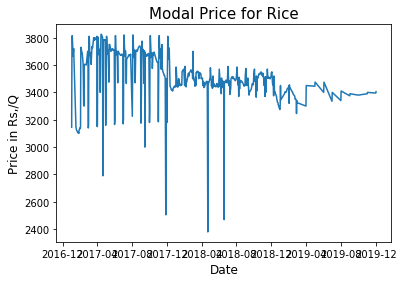

In [15]:
train=pd.read_excel('RicePrices.xlsx')
train.head()
# print(train.isnull().count())
# Taking data where value is present removing NR in prices
train=train[(train['Minimum Price(Rs./Quintal)']!="NR")]
train=train[(train['Market']=="Pal")]

data = train['Modal Price(Rs./Quintal)']
Date1 = train['Date']
train1 = train[['Date','Modal Price(Rs./Quintal)']]
print(train1.size)
# print(train1.to_string())
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
# print (type(train2))
# print (train2.head())
plot.plot(train2)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in Rs,/Q', fontsize=12)
plot.title("Modal Price for Rice", fontsize=15)
plot.show()

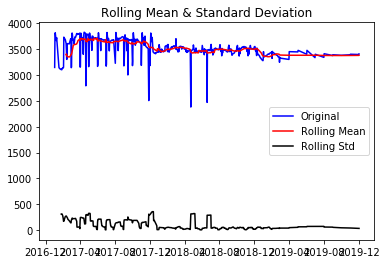

ADF Stastistic: -2.886915
p-value: 0.046891
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train2['Modal Price(Rs./Quintal)']      
test_stationarity(ts)


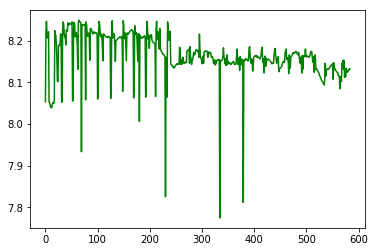

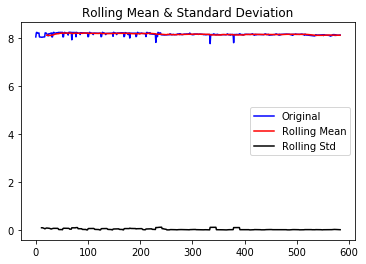

ADF Stastistic: -3.112280
p-value: 0.025658
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


In [17]:
# print(type(ts))
ts_list=ts.tolist()
ts_log = dragon.log(ts_list)
# ts.apply(dragon.log)
plot.plot(ts_log,color="green")
plot.show()
# print(type(ts_log))
test_stationarity(pd.Series(ts_log))

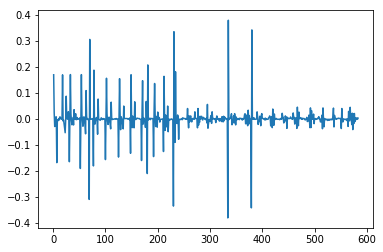

In [18]:
ts_log_diff = ts_log - pd.Series(ts_log).shift()
plot.plot(ts_log_diff)
plot.show()
# print(ts_log_diff)

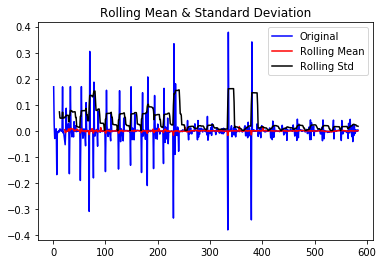

ADF Stastistic: -11.821896
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


In [19]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)
# print(ts_log_diff)

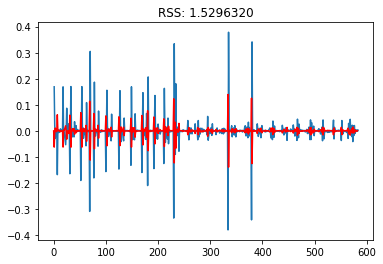

In [20]:
# follow lag
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

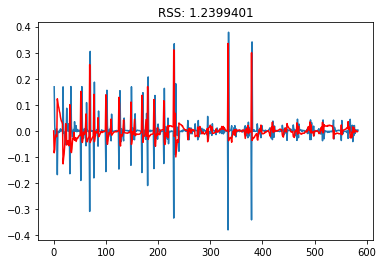

In [21]:
# follow error
model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()
# print(ts_log)

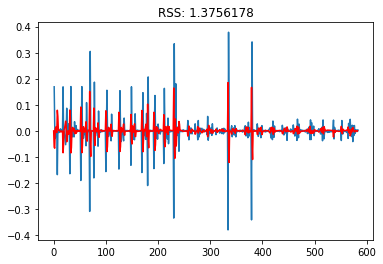

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

Printing Predicted vs Expected Values...


predicted = 3532.768324,   expected = 3520.000000,   error = 0.362736  %
predicted = 3524.492492,   expected = 3541.000000,   error = 0.466182  %
predicted = 3532.911063,   expected = 3505.000000,   error = 0.796321  %
predicted = 3516.013153,   expected = 3475.000000,   error = 1.180235  %
predicted = 3501.479841,   expected = 3450.000000,   error = 1.492169  %
predicted = 3472.023123,   expected = 3500.000000,   error = 0.799339  %
predicted = 3484.131140,   expected = 3485.000000,   error = 0.024931  %
predicted = 3476.221573,   expected = 3370.000000,   error = 3.151975  %
predicted = 3430.136697,   expected = 3515.000000,   error = 2.414319  %
predicted = 3481.984515,   expected = 3400.000000,   error = 2.411309  %
predicted = 3408.351415,   expected = 3510.000000,   error = 2.895971  %
predicted = 3493.949689,   expected = 3505.000000,   error = 0.315273  %
predicted = 3471.576718,   expected = 3510.000000,   error = 1.094680  %
predicte

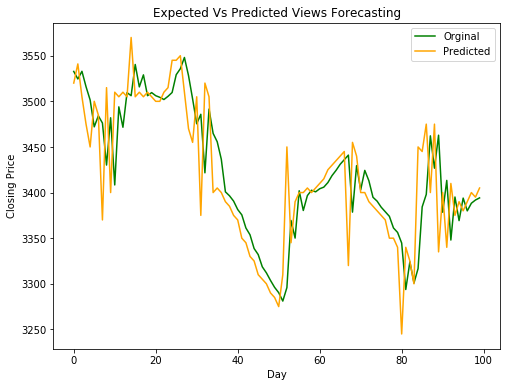

In [23]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history,order=(2,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    pred_value = output[0]
    original_value = test_arima[t]
    history.append(original_value)
    pred_value = dragon.exp(pred_value)
    original_value = dragon.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [14]:
# for stationary series
size = int(len(ts)-100)
# Divide into train and test
train_arima, test_arima = ts[0:size], ts[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history,order=(2,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    pred_value = output[0]
    original_value = test_arima[t]
    history.append(original_value)
    pred_value = dragon.exp(pred_value)
    original_value = dragon.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

Printing Predicted vs Expected Values...




ValueError: Insufficient degrees of freedom to estimate